In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    'healthcare_readmissions_dataset_train.csv',
    keep_default_na=False,
    na_values=[""]
)

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,Hospital ID,Height (m),Smoker,BMI,Weight (kg),Adjusted Weight (kg),Has Diabetes,Has Hypertension,Exercise Frequency,Diet Type,Number of Prior Visits,Medications Prescribed,Length of Stay,Type of Treatment,Readmission within 30 Days
0,1000000,23,Female,African American,Hosp2,1.6,False,25.0,64.0,63.283346,0,0,Regular,High-fat,3.0,3.0,0,None,0
1,1000002,56,Female,Hispanic,Hosp3,1.8,True,27.0,87.5,87.678859,0,0,Regular,High-fat,2.0,NaN,2,None,0
2,1000003,28,Male,African American,Hosp1,1.8,False,35.0,113.4,113.497844,0,1,None,Other,NaN,2.0,5,None,0
3,1000004,70,Female,Caucasian,Hosp2,1.8,False,27.7,89.7,89.717694,0,0,None,Other,3.0,NaN,0,Major Surgery,0
4,1000005,48,Female,Hispanic,Hosp1,1.9,False,22.4,80.9,80.528927,0,0,Occasional,High-fat,7.0,5.0,7,Major Surgery,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8038 entries, 0 to 8037
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   8038 non-null   int64  
 1   Age                         8038 non-null   int64  
 2   Gender                      8038 non-null   object 
 3   Ethnicity                   8038 non-null   object 
 4   Hospital ID                 8038 non-null   object 
 5   Height (m)                  8038 non-null   float64
 6   Smoker                      8038 non-null   bool   
 7   BMI                         8038 non-null   float64
 8   Weight (kg)                 8038 non-null   float64
 9   Adjusted Weight (kg)        8038 non-null   float64
 10  Has Diabetes                8038 non-null   int64  
 11  Has Hypertension            8038 non-null   int64  
 12  Exercise Frequency          8038 non-null   object 
 13  Diet Type                   8038 

In [5]:
df.isnull().sum()

PatientID                       0
Age                             0
Gender                          0
Ethnicity                       0
Hospital ID                     0
Height (m)                      0
Smoker                          0
BMI                             0
Weight (kg)                     0
Adjusted Weight (kg)            0
Has Diabetes                    0
Has Hypertension                0
Exercise Frequency              0
Diet Type                       0
Number of Prior Visits        314
Medications Prescribed        657
Length of Stay                  0
Type of Treatment               0
Readmission within 30 Days      0
dtype: int64

In [6]:
df.dtypes

PatientID                       int64
Age                             int64
Gender                         object
Ethnicity                      object
Hospital ID                    object
Height (m)                    float64
Smoker                           bool
BMI                           float64
Weight (kg)                   float64
Adjusted Weight (kg)          float64
Has Diabetes                    int64
Has Hypertension                int64
Exercise Frequency             object
Diet Type                      object
Number of Prior Visits        float64
Medications Prescribed        float64
Length of Stay                  int64
Type of Treatment              object
Readmission within 30 Days      int64
dtype: object

In [7]:
# update columns type
df = df.astype(
    {
        'PatientID': 'category', 
        'Has Diabetes': 'category',
        'Has Hypertension': 'category', 
        }
    )

In [8]:
# descriptive statistics for numeric columns
from scipy.stats import describe

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns 
category_columns = df.select_dtypes(include=['category']).columns.difference(['listing_id'])

scipy_stats = {}
for col in numeric_columns:
    stats = describe(df[col].dropna())
    scipy_stats[col] = {
        "count": stats.nobs,
        "mean": stats.mean,
        "variance": stats.variance,
        "min": stats.minmax[0],
        "max": stats.minmax[1],
        "skewness": stats.skewness,
        "kurtosis": stats.kurtosis
    }

scipy_stats_df = pd.DataFrame(scipy_stats).T

scipy_stats_df

,count,mean,variance,min,max,skewness,kurtosis
Age,8038.0,51.123787,401.609535,18.000000,195.000000,1.371042,5.907435
Height (m),8038.0,1.700983,0.010848,1.300000,2.000000,-0.060582,-0.086343
BMI,8038.0,26.258335,22.592016,8.300000,44.000000,0.113141,0.111849
Weight (kg),8038.0,77.145366,359.521762,23.300000,236.300000,1.390888,6.380798
Adjusted Weight (kg),8038.0,76.269064,278.935515,23.126324,159.051116,0.336291,0.213913
Number of Prior Visits,7724.0,3.044795,3.028422,0.000000,11.000000,0.565328,0.228922
Medications Prescribed,7381.0,3.509010,3.822581,0.000000,12.000000,0.212052,-0.311915
Length of Stay,8038.0,2.544041,8.825919,0.000000,23.000000,1.898106,4.931650
Readmission within 30 Days,8038.0,0.173426,0.143367,0.000000,1.000000,1.725095,0.975954


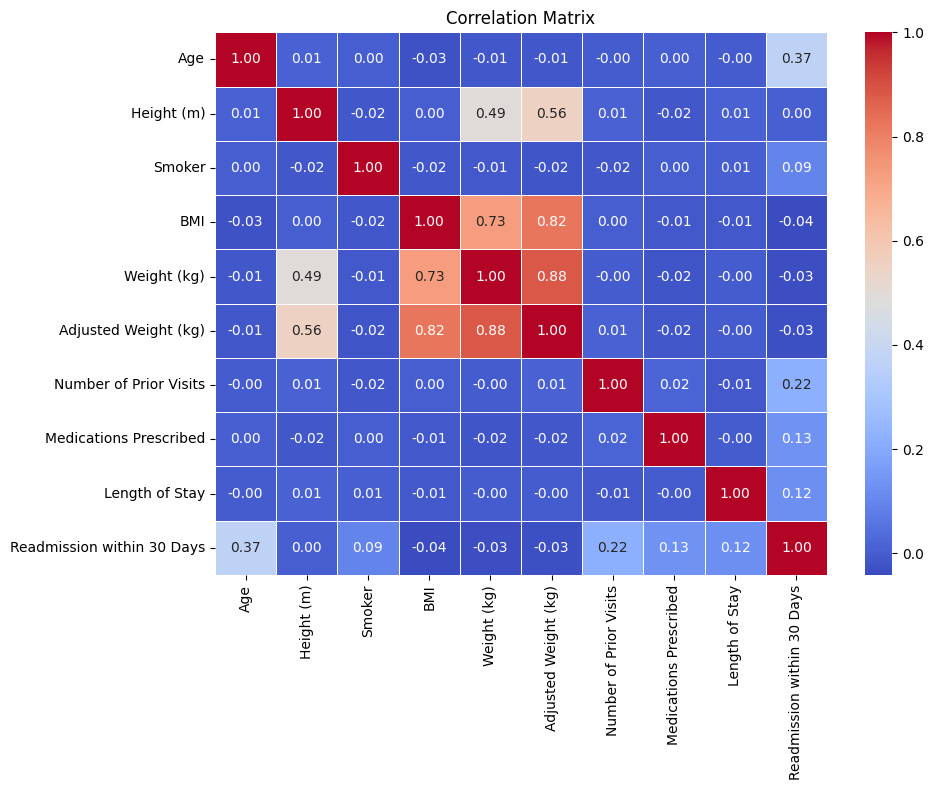

In [9]:
# Compute correlation matrix for all numeric columns
df_corr = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df.corr(numeric_only=True)

correlation_matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Load dataset (preserve 'None' as literal string)
df = pd.read_csv(
    'healthcare_readmissions_dataset_train.csv',
    keep_default_na=False,
    na_values=[""]
)

# -----------------------------
# 1. Handling Missing Values
# -----------------------------

# Impute mode for discrete variables
df['Number of Prior Visits'] = df['Number of Prior Visits'].fillna(df['Number of Prior Visits'].mode()[0])
df['Medications Prescribed'] = df['Medications Prescribed'].fillna(df['Medications Prescribed'].mode()[0])

# -----------------------------
# 2. Feature Engineering
# -----------------------------

# Ordinal encoding: Exercise Frequency
exercise_map = {'None': 0, 'Occasional': 1, 'Regular': 2}
df['Exercise_Encoded'] = df['Exercise Frequency'].map(exercise_map)

# BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Age Group
def age_group(age):
    if age < 40:
        return '<40'
    elif age < 65:
        return '40-64'
    else:
        return '65+'

df['Age_Group'] = df['Age'].apply(age_group)

# One-hot encoding of categorical variables
df = pd.get_dummies(df, columns=[
    'Gender', 
    'Ethnicity', 
    'Diet Type', 
    'Type of Treatment', 
    'BMI_Category', 
    'Age_Group'
], drop_first=True)

# -----------------------------
# 3. Feature Selection
# -----------------------------

# Drop non-predictive or redundant features
df = df.drop(columns=[
    'Hospital ID',        # No predictive value
    'Adjusted Weight (kg)',    # Redundant with BMI
    'Weight (kg)',             # Reflected in BMI
    'Exercise Frequency'  # Replaced by encoded version
])

# Final dataset is now ready for modeling
print("Prepared dataset shape:", df.shape)
df.head()


Prepared dataset shape: (8038, 27)


,PatientID,Age,Height (m),Smoker,BMI,Has Diabetes,Has Hypertension,Number of Prior Visits,Medications Prescribed,Length of Stay,...,Diet Type_Other,Diet Type_Vegetarian,Type of Treatment_Minor Surgery,Type of Treatment_None,Type of Treatment_Other Treatment,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Group_65+,Age_Group_<40
0,1000000,23,1.6,False,25.0,0,0,3.0,3.0,0,...,False,False,False,True,False,False,True,False,False,True
1,1000002,56,1.8,True,27.0,0,0,2.0,3.0,2,...,False,False,False,True,False,False,True,False,False,False
2,1000003,28,1.8,False,35.0,0,1,3.0,2.0,5,...,True,False,False,True,False,True,False,False,False,True
3,1000004,70,1.8,False,27.7,0,0,3.0,3.0,0,...,True,False,False,False,False,False,True,False,True,False
4,1000005,48,1.9,False,22.4,0,0,7.0,5.0,7,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8038 entries, 0 to 8037
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PatientID                          8038 non-null   int64  
 1   Age                                8038 non-null   int64  
 2   Height (m)                         8038 non-null   float64
 3   Smoker                             8038 non-null   bool   
 4   BMI                                8038 non-null   float64
 5   Has Diabetes                       8038 non-null   int64  
 6   Has Hypertension                   8038 non-null   int64  
 7   Number of Prior Visits             8038 non-null   float64
 8   Medications Prescribed             8038 non-null   float64
 9   Length of Stay                     8038 non-null   int64  
 10  Readmission within 30 Days         8038 non-null   int64  
 11  Exercise_Encoded                   8038 non-null   int64

In [12]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Readmission within 30 Days'])
y = df['Readmission within 30 Days']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Confirm class balance
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: Readmission within 30 Days
0    6644
1    1394
Name: count, dtype: int64
After SMOTE: Readmission within 30 Days
0    6644
1    6644
Name: count, dtype: int64
